Step #1 - import libraries


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats
import numpy as np
import seaborn as sns
import imageio
import os
%matplotlib inline


Step #2 - upload files

In [4]:
continents = pd.read_excel("continents.xlsx")
life = pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)
pop = pd.read_excel("gapminder_population.xlsx", index_col=0)
fert = pd.read_csv("gapminder_total_fertility.csv", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'continents.xlsx'

Step #2 

In [2]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col =0) 

Step #3

In [3]:
print(fert.shape)
print(life.shape)

(260, 216)
(260, 217)


Step #4

In [4]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [5]:
life.columns

Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
              1808.0, 1809.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=217)

In [6]:
fert.columns = fert.columns.astype(int)
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [7]:
life.columns = life.columns.astype(int)
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

Step #5

In [8]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

In [9]:
fert.index.name='country'

Step #6

In [10]:
fert = fert.reset_index()

In [11]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [12]:
fert.head(10)

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
5,American Samoa,1800,NaN
6,Andorra,1800,NaN
7,Angola,1800,6.93
8,Anguilla,1800,NaN
9,Antigua and Barbuda,1800,5.00


Step #7

In [13]:
life.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'South Sudan'],
      dtype='object', name='Life expectancy', length=260)

In [14]:
life.index.name='country'

In [15]:
life = life.reset_index()

In [16]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')

In [17]:
life.head(10)

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
5,American Samoa,1800,NaN
6,Andorra,1800,NaN
7,Angola,1800,26.98
8,Anguilla,1800,NaN
9,Antigua and Barbuda,1800,33.54


Step #8

In [18]:
import pandas as pd

In [19]:
pop = pd.pandas.read_excel('gapminder_population.xlsx', index_col =0) 

In [20]:
print(pop.shape)

(275, 81)


In [21]:
pop.columns

Float64Index([1800.0, 1810.0, 1820.0, 1830.0, 1840.0, 1850.0, 1860.0, 1870.0,
              1880.0, 1890.0, 1900.0, 1910.0, 1920.0, 1930.0, 1940.0, 1950.0,
              1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0,
              1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0,
              1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0,
              1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0,
              1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0,
              1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0,
              1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0,
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0],
             dtype='float64')

In [22]:
pop.columns = pop.columns.astype(int)
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [23]:
pop.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'British Indian Ocean Territory', 'Clipperton',
       'French Southern and Antarctic Lands', 'Gaza Strip',
       'Heard and McDonald Islands', 'Northern Marianas',
       'South Georgia and the South Sandwich Islands',
       'US Minor Outlying Islands', 'Virgin Islands', 'West Bank'],
      dtype='object', name='Total population', length=275)

In [24]:
pop.index.name='country'

In [25]:
pop = pop.reset_index()

In [26]:
pop = pop.melt(id_vars='country', var_name='year', value_name='total_population')

In [27]:
pop.head(20)

,country,year,total_population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
5,American Samoa,1800,8170.0
6,Andorra,1800,2654.0
7,Angola,1800,1567028.0
8,Anguilla,1800,2025.0
9,Antigua and Barbuda,1800,37000.0


Step #9

In [28]:
df2 = fert.merge(pop)

In [29]:
df3 = df2.merge(life)

Step #10

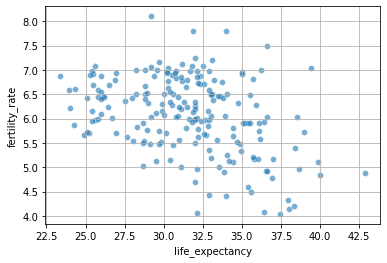

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df3.loc[df3['year'] == 1800]
sns.scatterplot(x='life_expectancy', y='fertility_rate',
                data=df_subset, alpha=0.6)
plt.grid()


Step #11

In [ ]:
import imageio

images = []
folder = '/Users/mac/spice/week_1/gif_plot'
for year in range(1960, 2016):
    
    plt.axis((0, 100, 0, 10))
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x='life_expectancy',
                    y='fertility_rate',
                    hue='country',
                    size='total_population',
                    sizes=(150,1500),
                    legend=False,
                    data=df3.loc[df3['year']==year],
                    alpha=0.6,
                    palette='ch:s=.25,rot=-.25')
    
    plt.xlabel('Life expectancy',fontsize = 30)
    plt.ylabel('Fertility rate',fontsize = 30)
    plt.title('Fertility by Life Expectancy',fontsize = 30)
    
    plt.tick_params(axis='both', which='minor', labelsize=40)

    filename = f'lifeexp_{year}.png'
    
    plt.savefig(os.path.join(folder,filename))
    images.append(imageio.imread(os.path.join(folder,filename)))
    plt.figure()

    
    imageio.mimsave(os.path.join(folder,'scatterplot.gif'), images, fps=80)



/var/folders/28/q0g028595jx6l9lsrgz63tpm0000gn/T/ipykernel_59035/3592562385.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
